In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [2]:
FILE_NAME = 'weightedGSAGE_128_128_relu_20_5_adjacentTF_1e-4'

df = pd.read_csv(f'./emb/{FILE_NAME}.csv', index_col=0)
df.drop(['type'], axis=1, inplace=True)
df

0         1         2         3         4         5  \
MCHR1     0.051706  0.000000  0.022423  0.011718  0.000000  0.070889   
PSMD9     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CRIP1     0.000000  0.172792  0.000000  0.000000  0.000000  0.000000   
GIMAP4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
GATM      0.131179  0.000000  0.000182  0.031373  0.107173  0.000000   
...            ...       ...       ...       ...       ...       ...   
ERCC5     0.000000  0.000000  0.000000  0.153527  0.000000  0.000000   
MARVELD1  0.072250  0.000000  0.019223  0.088162  0.000000  0.000000   
YTHDC2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
SRC       0.000000  0.000000  0.000000  0.129606  0.000000  0.000000   
C1GALT1   0.055451  0.000000  0.127794  0.026874  0.000000  0.091988   

                 6         7         8         9  ...       118       119  \
MCHR1     0.000000  0.000000  0.000000  0.015993  ...  0.000000  0.000000   
PSMD9     0.000000  0.031498  0.000000  0.000000  ...  0.000000  0.160107   
CRIP1     0.000000  0.000000  0.076026  0.000000  ...  0.080005  0.000000   
GIMAP4    0.000000  0.000000  0.421922  0.195969  ...  0.081201  0.000000   
GATM      0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
...            ...       ...       ...       ...  ...       ...       ...   
ERCC5     0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.097287   
MARVELD1  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
YTHDC2    0.000000  0.000000  0.000000  0.000000  ...  0.123298  0.000000   
SRC       0.176771  0.000000  0.000000  0.000000  ...  0.000000  0.123752   
C1GALT1   0.000000  0.039864  0.000000  0.000000  ...  0.000000  0.000000   

               120  121       122       123       124  125       126       127  
MCHR1     0.000000  0.0  0.051805  0.000000  0.050516  0.0  0.000000  0.000000  
PSMD9     0.000000  0.0  0.000000  0.280932  0.080330  0.0  0.096304  0.000000  
CRIP1     0.018316  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  
GIMAP4    0.068648  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.002007  
GATM      0.000000  0.0  0.043288  0.000000  0.042210  0.0  0.000000  0.000000  
...            ...  ...       ...       ...       ...  ...       ...       ...  
ERCC5     0.000000  0.0  0.000000  0.152791  0.091403  0.0  0.187461  0.000000  
MARVELD1  0.000000  0.0  0.046935  0.000000  0.045767  0.0  0.000000  0.000000  
YTHDC2    0.090178  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  
SRC       0.000000  0.0  0.000000  0.209498  0.009815  0.0  0.282804  0.000000  
C1GALT1   0.000000  0.0  0.044424  0.000000  0.043318  0.0  0.000000  0.000000  

[18573 rows x 128 columns]

Running TSNE...
Plotting...


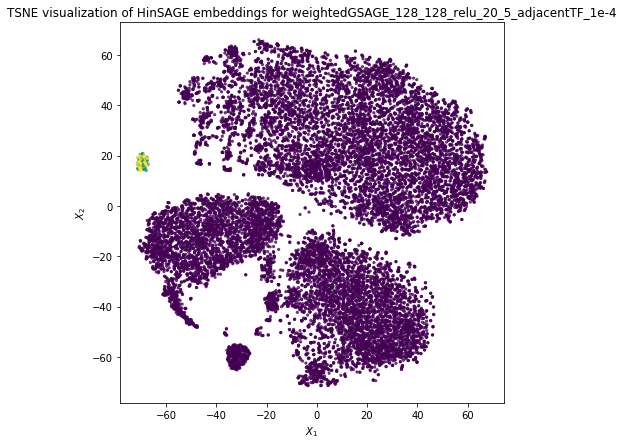

In [3]:
all_embeddings = df.to_numpy()
print('Running TSNE...')
trans = TSNE(n_components=2, random_state=0)
emb_transformed = pd.DataFrame(trans.fit_transform(all_embeddings), index=df.index)

def geneType(name):
    if name[-2:] == '_k':
        return 1
    elif name[-3:] == '_gm':
        return 2
    else:
        return 0

emb_transformed['type'] = emb_transformed.index.map(geneType)

alpha = 0.7

print('Plotting...')
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["type"],
#     cmap="Paired",
    alpha=alpha,
    s=5
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(f"TSNE visualization of HinSAGE embeddings for {FILE_NAME}")

# plt.savefig(f'./img/full/{FILE_NAME}.png', dpi=150)
plt.show()